# An√°lise Explorat√≥ria de Dados

## 1) Entendimento dos dados:

In [69]:
# Import das bibliotecas necess√°rias
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import os

# Import dos dados
df = pd.read_csv('../dados/processed/car_price_dataset_clean.csv')
df.head()

Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867

### Dicion√°rio dos dados:

| Coluna        | Tipo Estat√≠stico | Tipo Computacional | Significado                                                                 |
|---------------|------------------|--------------------|----------------------------------------------------------------------------|
| Brand         | Qualitativo      | object (string)    | Marca do ve√≠culo                                                           |
| Model         | Qualitativo      | object (string)    | Modelo do ve√≠culo                                                          |
| Year          | Quantitativo     | int64              | Ano de fabrica√ß√£o do ve√≠culo                                               |
| Engine_Size   | Quantitativo     | float64            | Tamanho do motor do ve√≠culo (em litros)                                    |
| Fuel_Type     | Qualitativo      | object (string)    | Tipo de combust√≠vel utilizado pelo ve√≠culo                                 |
| Transmission  | Qualitativo      | object (string)    | Tipo de transmiss√£o do ve√≠culo (Manual, Autom√°tica, Semi-Autom√°tica, etc.) |
| Mileage       | Quantitativo     | int64              | Quilometragem rodada pelo ve√≠culo                                          |
| Doors         | Quantitativo     | int64              | N√∫mero de portas do ve√≠culo                                                |
| Owner_Count   | Quantitativo     | int64              | N√∫mero de propriet√°rios anteriores                                         |
| Price         | Quantitativo     | int64              | Pre√ßo do ve√≠culo (em unidade monet√°ria)                                    |

## 2) An√°lise Univariada

In [2]:
# Criando fun√ß√µes para an√°lise univariada
def estatistica_qualitativa(df, column):
    coluna = df[column].copy()
    contagem = coluna.value_counts()
    proporcao = coluna.value_counts(normalize=True) * 100
    df_resumo = pd.DataFrame({'Contagem': contagem, 'Propor√ß√£o (%)': proporcao})
    df_resumo.index.name = column
    df_resumo.reset_index(inplace=True)
    df_resumo['Propor√ß√£o (%)'] = df_resumo['Propor√ß√£o (%)'].round(2)
    return df_resumo

def plot_histogram(df, column, qtd_bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=qtd_bins)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequ√™ncia')
    plt.grid()
    plt.show()

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.grid()
    plt.show()


def plot_bar(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts(normalize=True).index)
    plt.title(f'Contagem de {column}')
    plt.xlabel('Frequ√™ncia')
    plt.ylabel(column)
    plt.grid()
    plt.show()

def plot_pie(df, column):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Gr√°fico de Pizza de {column}')
    plt.ylabel('')
    plt.grid()
    plt.show()

### `Brand`:

In [3]:
estatistica_qualitativa(df, 'Brand')

Brand  Contagem  Propor√ß√£o (%)
0        Ford      1048          10.48
1        Audi      1038          10.38
2  Volkswagen      1020          10.20
3       Honda      1009          10.09
4   Chevrolet      1003          10.03
5         BMW       999           9.99
6     Hyundai       995           9.95
7         Kia       976           9.76
8      Toyota       970           9.70
9    Mercedes       942           9.42

In [4]:
diferenca_max_min = df['Brand'].value_counts().max() - df['Brand'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Brand'].value_counts().min()) * 100

print(f'Diferen√ßa entre a marca mais frequente e a menos frequente: {diferenca_max_min}')
print(f'Quantidade de registros da marca mais frequente: {df["Brand"].value_counts().max()}')

print(f'Propor√ß√£o da diferen√ßa em rela√ß√£o √† marca menos frequente: {proporcao_max_min:.2f}%')

Diferen√ßa entre a marca mais frequente e a menos frequente: 106
Quantidade de registros da marca mais frequente: 1048
Propor√ß√£o da diferen√ßa em rela√ß√£o √† marca menos frequente: 11.25%


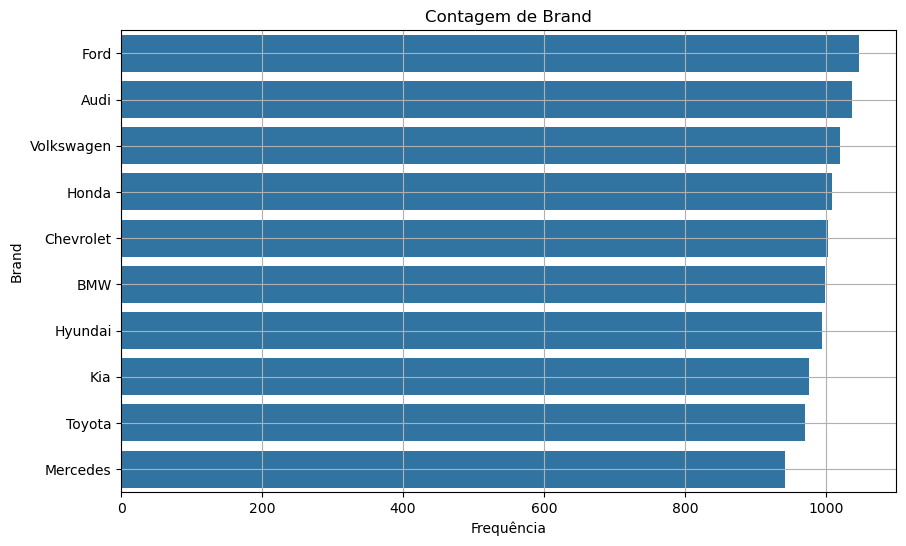

In [5]:
plot_bar(df, 'Brand')

> H√° uma quantidade balanceada de registros de cada Marca de carro, havendo no total 10 valores de marcas de carros, como exibidos na tabela acima

> A Ford √© a marca com maior quantidade de ve√≠culos, por√©m tem apenas 11.25% dados a mais em rela√ß√£o a marca com menor quantidade de ve√≠culos (Mercedes)

### `Model`:

In [6]:
estatistica_qualitativa(df, 'Model')

Model  Contagem  Propor√ß√£o (%)
0     Accord       365           3.65
1     Fiesta       363           3.63
2     Impala       355           3.55
3   5 Series       353           3.53
4     Tiguan       352           3.52
5      Focus       351           3.51
6         Q5       350           3.50
7         A4       350           3.50
8    Elantra       347           3.47
9       Golf       339           3.39
10        A3       338           3.38
11    Optima       336           3.36
12     Civic       336           3.36
13  3 Series       335           3.35
14  Explorer       334           3.34
15    Malibu       333           3.33
16    Passat       329           3.29
17    Tucson       329           3.29
18       Rio       327           3.27
19   Corolla       325           3.25
20      RAV4       324           3.24
21     Camry       321           3.21
22   E-Class       321           3.21
23    Sonata       319           3.19
24   Equinox       315           3.15
25       GLA       315           3.15
26  Sportage       313           3.13
27        X5       311           3.11
28      CR-V       308           3.08
29   C-Class       306           3.06

In [7]:
diferenca_max_min = df['Model'].value_counts().max() - df['Model'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Brand'].value_counts().min()) * 100

print(f'Diferen√ßa entre a marca mais frequente e a menos frequente: {diferenca_max_min}')
print(f'Quantidade de registros da marca mais frequente: {df["Model"].value_counts().max()}')

print(f'Propor√ß√£o da diferen√ßa em rela√ß√£o √† marca menos frequente: {proporcao_max_min:.2f}%')

Diferen√ßa entre a marca mais frequente e a menos frequente: 59
Quantidade de registros da marca mais frequente: 365
Propor√ß√£o da diferen√ßa em rela√ß√£o √† marca menos frequente: 6.26%


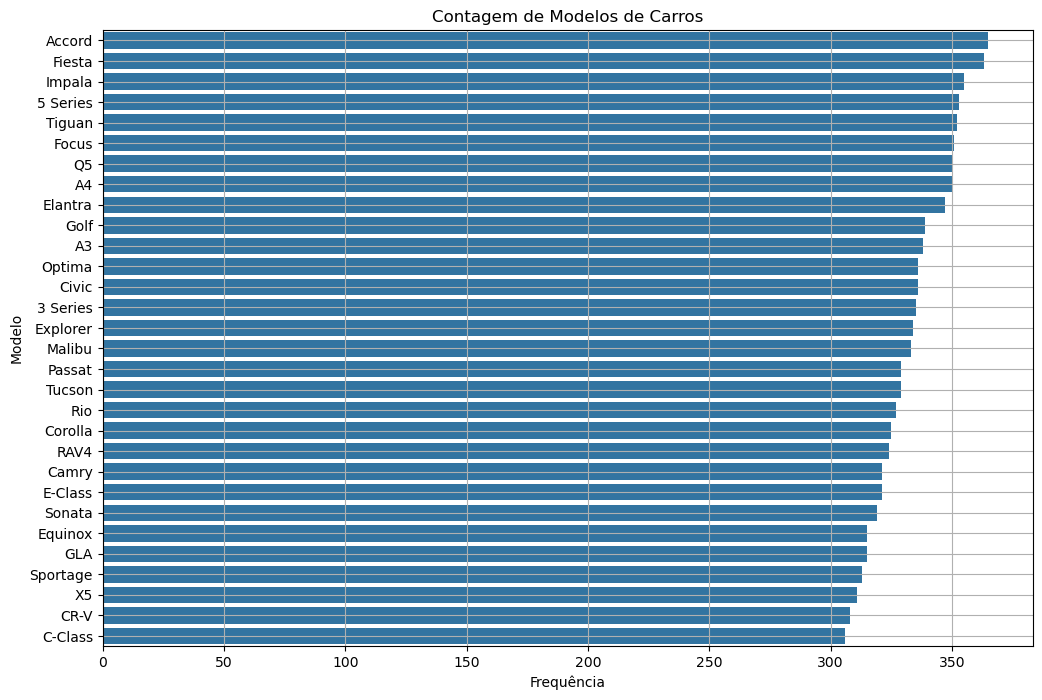

In [8]:
# Plotar grafico de barras horizontais que possa suportar 29 modelos de carros
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Model'], order=df['Model'].value_counts().index)
plt.title('Contagem de Modelos de Carros')
plt.xlabel('Frequ√™ncia')
plt.ylabel('Modelo')
plt.grid()  
plt.show()


> Mesmo havendo um total de 30 modelos, n√£o h√° uma diferen√ßa significativa entre a quantidade de dados de carro por marca, garantindo um balanceamento para tal fator

> O Accord √© o modelo com maior quantidade de ve√≠culos, por√©m tem apenas 6.26% dados a mais em rela√ß√£o ao modelo com menor quantidade de ve√≠culos (C-Class)

### `Year`:

In [9]:
df['Year'].describe()

count    10000.000000
mean      2011.543700
std          6.897699
min       2000.000000
25%       2006.000000
50%       2012.000000
75%       2017.000000
max       2023.000000
Name: Year, dtype: float64

In [10]:
estatistica_qualitativa(df, 'Year')

Year  Contagem  Propor√ß√£o (%)
0   2002       462           4.62
1   2011       449           4.49
2   2023       448           4.48
3   2012       437           4.37
4   2017       433           4.33
5   2005       431           4.31
6   2010       431           4.31
7   2007       430           4.30
8   2015       426           4.26
9   2018       425           4.25
10  2013       422           4.22
11  2019       421           4.21
12  2014       417           4.17
13  2006       415           4.15
14  2020       415           4.15
15  2001       406           4.06
16  2009       399           3.99
17  2022       397           3.97
18  2016       395           3.95
19  2004       394           3.94
20  2000       393           3.93
21  2021       391           3.91
22  2008       382           3.82
23  2003       381           3.81

In [11]:
diferenca_max_min = df['Year'].value_counts().max() - df['Year'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Year'].value_counts().min()) * 100

print(f'Diferen√ßa entre o ano com mais ve√≠culos e ano com menos: {diferenca_max_min}')
print(f'Quantidade de registros do ano que mais aparece: {df["Year"].value_counts().max()}')

print(f'Propor√ß√£o da diferen√ßa em rela√ß√£o aos anos de ve√≠culos: {proporcao_max_min:.2f}%')

Diferen√ßa entre o ano com mais ve√≠culos e ano com menos: 81
Quantidade de registros do ano que mais aparece: 462
Propor√ß√£o da diferen√ßa em rela√ß√£o aos anos de ve√≠culos: 21.26%


Text(0.5, 1.0, 'Contagem de Anos de Carros')

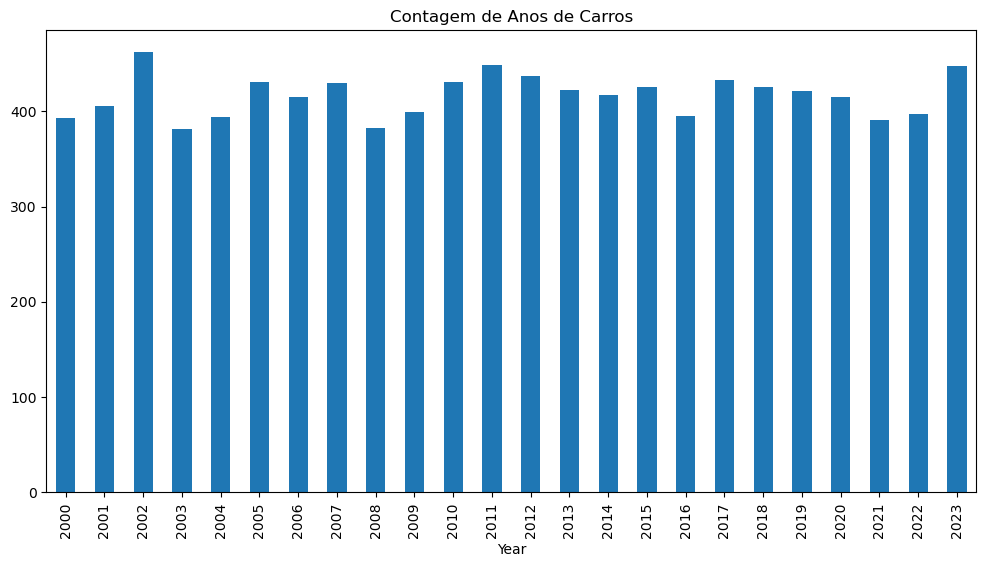

In [12]:
# Gr√°fico de barras para anos ordenado por ano
ax = df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Contagem de Anos de Carros')

In [13]:
# An√°lise por decada
df_2000s = df[df['Year'].between(2000, 2009)]
df_2010s = df[df['Year'].between(2010, 2019)]
df_2020s = df[df['Year'] >= 2020]

print(f'Quantidade de ve√≠culos dos anos 2000: {len(df_2000s)}')
print(f'Quantidade de ve√≠culos dos anos 2010: {len(df_2010s)}')
print(f'Quantidade de ve√≠culos dos anos 2020: {len(df_2020s)}')

Quantidade de ve√≠culos dos anos 2000: 4093
Quantidade de ve√≠culos dos anos 2010: 4256
Quantidade de ve√≠culos dos anos 2020: 1651


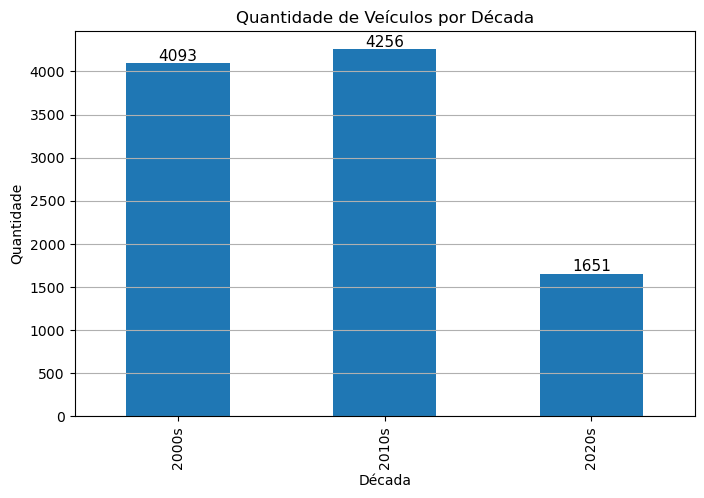

In [14]:
# Gr√°fico de barras para d√©cadas
# Criando uma Series com as quantidades por d√©cada
decadas = pd.Series({
    '2000s': len(df_2000s),
    '2010s': len(df_2010s),
    '2020s': len(df_2020s)
})

# Plotando o gr√°fico de barras
plt.figure(figsize=(8, 5))
ax = decadas.plot(kind='bar')
plt.title('Quantidade de Ve√≠culos por D√©cada')
plt.xlabel('D√©cada')
plt.ylabel('Quantidade')
plt.grid(axis='y')

# Adicionando os valores acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.show()


> H√° um leve desbalanceamento em rela√ß√£o a quantidade de ve√≠culos por ano, e ainda maior considerando por d√©cada, onde h√° uma quantidade relativamente menor de ve√≠culos da d√©cada de 2020 e prepoder√¢ncia da d√©cada de 2010.

### `Engine_Size`:

In [15]:
df['Engine_Size'].describe()

count    10000.000000
mean         3.000560
std          1.149324
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Engine_Size, dtype: float64

In [16]:
df['Engine_Size'].value_counts()

Engine_Size
3.7    273
4.4    271
3.6    267
2.5    266
1.5    265
4.0    263
2.8    262
4.6    262
1.3    261
2.2    259
1.4    259
2.6    259
1.6    258
2.0    258
4.1    257
3.5    256
3.1    254
3.3    254
4.7    253
3.8    253
2.9    253
1.2    251
4.5    250
2.7    250
3.2    249
1.8    249
4.9    247
1.7    246
3.4    243
4.3    242
2.4    240
3.0    236
3.9    236
2.1    234
4.2    232
1.9    232
4.8    231
1.1    230
2.3    223
1.0    113
5.0    103
Name: count, dtype: int64

In [17]:
# Calcular bins com a regra de Sturges
x = df['Engine_Size'].dropna()
n = len(df['Engine_Size'])

sturges_bins = int(np.ceil(np.log2(n) + 1))

# Calcular bins com Rice
rice_bins = int(np.ceil(2 * n ** (1/3)))

# Calcular bins com Freedman‚ÄìDiaconis
iqr = x.quantile(0.75) - x.quantile(0.25)
bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((x.max() - x.min()) / bin_width))

print(f'Sturges: {sturges_bins} bins')
print(f'Rice: {rice_bins} bins')
print(f'Freedman‚ÄìDiaconis: {fd_bins} bins')

Sturges: 15 bins
Rice: 44 bins
Freedman‚ÄìDiaconis: 22 bins


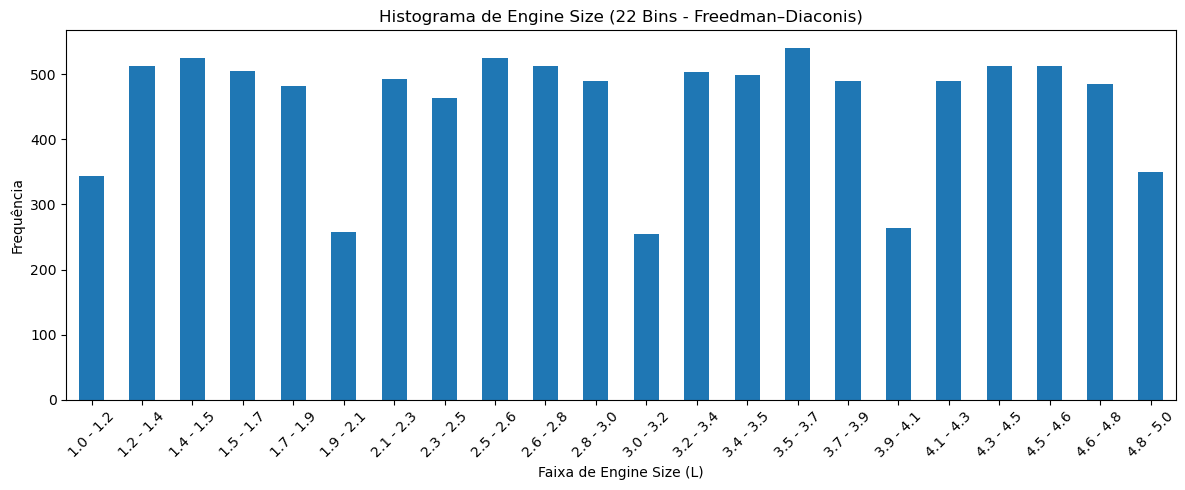

In [18]:
x = df['Engine_Size'].dropna()

# Gerar os 22 intervalos manualmente
bin_edges = np.linspace(x.min(), x.max(), num=23)  # 23 pontos = 22 intervalos
labels = [f"{round(bin_edges[i],1)} - {round(bin_edges[i+1],1)}" for i in range(len(bin_edges)-1)]

# Criar uma nova coluna com os r√≥tulos dos bins
df['Engine_Bin'] = pd.cut(x, bins=bin_edges, labels=labels, include_lowest=True)

# Ver quantos dados ca√≠ram em cada intervalo
frequencias = df['Engine_Bin'].value_counts().sort_index()

# Plotar histograma com r√≥tulos personalizados
frequencias.plot(kind='bar', figsize=(12, 5))
plt.xticks(rotation=45)
plt.xlabel('Faixa de Engine Size (L)')
plt.ylabel('Frequ√™ncia')
plt.title('Histograma de Engine Size (22 Bins - Freedman‚ÄìDiaconis)')
plt.tight_layout()
plt.show()

In [19]:
# Agrupando motores
def categorize_engine_size(size):
    if size < 1.0:
        return 'Menos de 1.0L'
    elif 1.0 <= size < 1.5:
        return '1.0L a 1.5L'
    elif 1.5 <= size < 2.0:
        return '1.5L a 2.0L'
    elif 2.0 <= size < 2.5:
        return '2.0L a 2.5L'
    elif 2.5 <= size < 3.0:
        return '2.5L a 3.0L'
    elif 3.0 <= size < 3.5:
        return '3.0L a 3.5L'
    elif 3.5 <= size < 4.0:
        return '3.5L a 4.0L'
    elif 4.0 <= size < 4.5:
        return '4.0L a 4.5L'
    elif 4.5 <= size < 5.0:
        return '4.5L a 5.0L'
    
df_agrupamento = df.copy()
df_agrupamento['Engine_Size_Category'] = df_agrupamento['Engine_Size'].apply(categorize_engine_size)
estatistica_qualitativa(df_agrupamento, 'Engine_Size_Category')

Engine_Size_Category  Contagem  Propor√ß√£o (%)
0          2.5L a 3.0L      1290          13.03
1          3.5L a 4.0L      1285          12.98
2          4.0L a 4.5L      1265          12.78
3          1.5L a 2.0L      1250          12.63
4          4.5L a 5.0L      1243          12.56
5          3.0L a 3.5L      1236          12.49
6          2.0L a 2.5L      1214          12.27
7          1.0L a 1.5L      1114          11.26

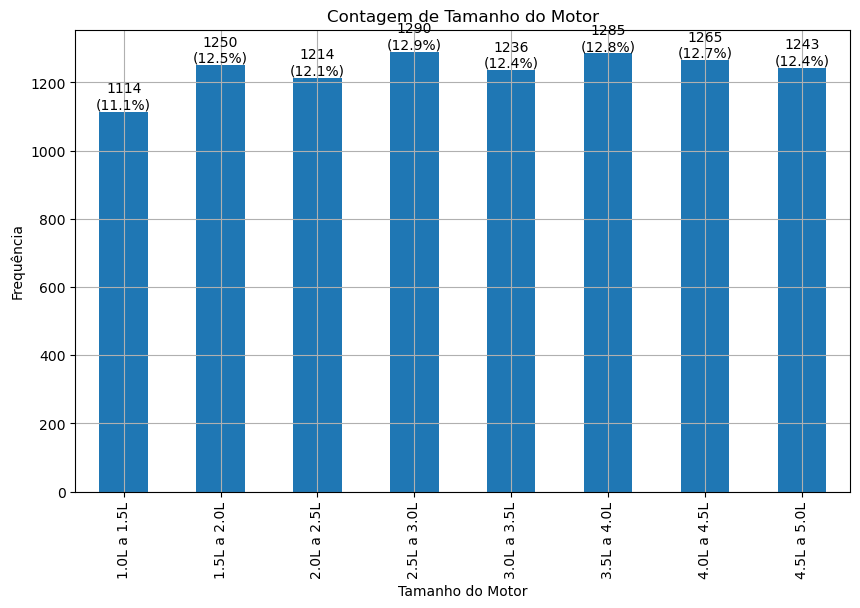

In [20]:
# Plotar gr√°fico de barras para categorias de tamanho do motor com n√∫meros e porcentagem
ax = df_agrupamento['Engine_Size_Category'].value_counts().sort_index().plot(
    kind='bar', figsize=(10, 6)
)
plt.title('Contagem de Tamanho do Motor')
plt.xlabel('Tamanho do Motor')
plt.ylabel('Frequ√™ncia')
plt.grid()

# Adiciona os valores absolutos e percentuais acima das barras
total = len(df_agrupamento)
for p in ax.patches:
    valor = int(p.get_height())
    percentual = valor / total * 100
    ax.annotate(f'{valor}\n({percentual:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()


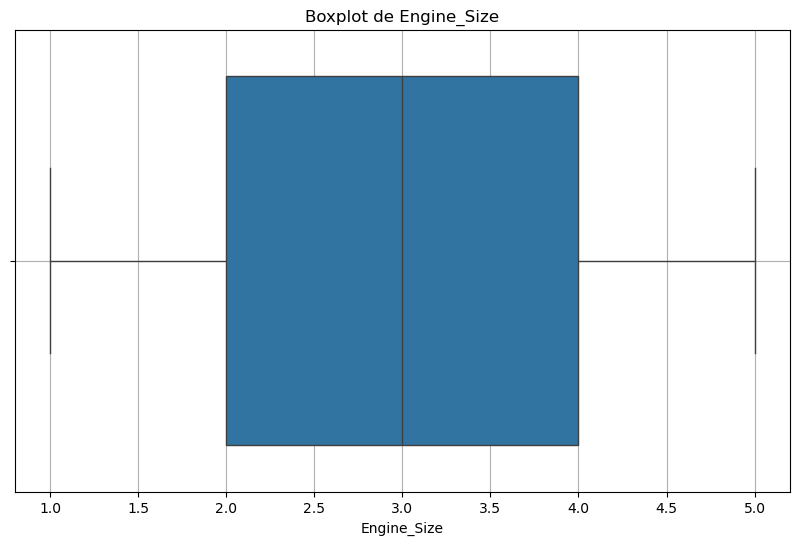

In [21]:
# Boxplot
plot_boxplot(df, 'Engine_Size')

In [22]:
IQR_Engine_Size = df['Engine_Size'].quantile(0.75) - df['Engine_Size'].quantile(0.25)
quartis = df['Engine_Size'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(f'IQR do tamanho do motor: {IQR_Engine_Size}')
print(f'Quartis do tamanho do motor:\n{quartis}')
print(f'Curtoses do tamanho do motor:\n{stats.kurtosis(df["Engine_Size"])}')
print(f'Assimetria do tamanho do motor:\n{stats.skew(df["Engine_Size"])}')

IQR do tamanho do motor: 2.0
Quartis do tamanho do motor:
0.1    1.4
0.2    1.8
0.3    2.2
0.4    2.6
0.5    3.0
0.6    3.4
0.7    3.8
0.8    4.2
0.9    4.6
Name: Engine_Size, dtype: float64
Curtoses do tamanho do motor:
-1.1966318041432136
Assimetria do tamanho do motor:
-0.008233754006580602


> H√° uma disparidade grande em rela√ß√£o a quantidade de ve√≠culos com volume interno do maior que 2.0L e os de quantia menor.

> No demais, h√° uma quantidade balanceada em rela√ß√£o a quantidade de ve√≠culos por faixa de volume interno do motor

### `Fuel Type`

In [23]:
estatistica_qualitativa(df, 'Fuel_Type')

Fuel_Type  Contagem  Propor√ß√£o (%)
0  Electric      2625          26.25
1    Diesel      2512          25.12
2    Hybrid      2453          24.53
3    Petrol      2410          24.10

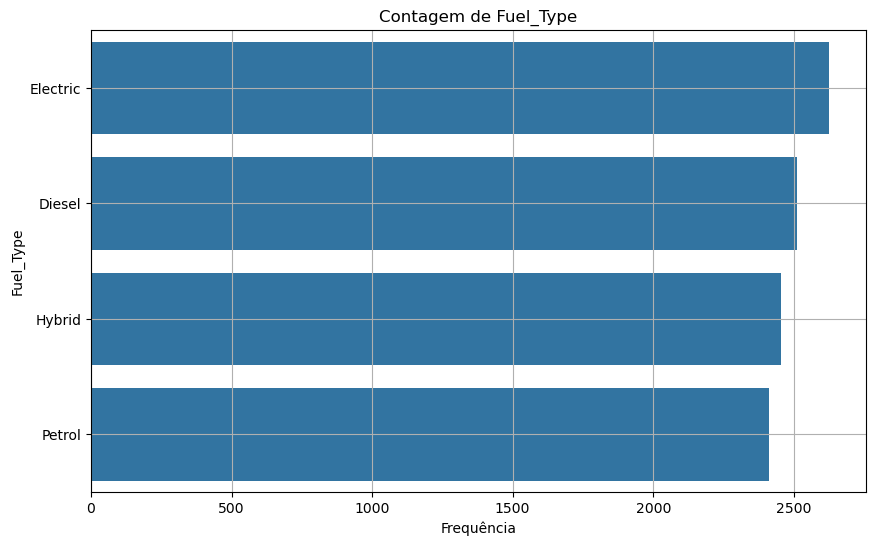

In [24]:
plot_bar(df, 'Fuel_Type')

In [25]:
diferenca_max_min = df['Fuel_Type'].value_counts().max() - df['Fuel_Type'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Fuel_Type'].value_counts().min()) * 100

print(f'Diferen√ßa de dados entre o tipo de combust√≠vel com maior quantidade de ve√≠culos e o menor : {diferenca_max_min}')
print(f'Quantidade de registros do mais frequente: {df["Fuel_Type"].value_counts().max()}')

print(f'Propor√ß√£o da diferen√ßa em rela√ß√£o ao marca menos frequente: {proporcao_max_min:.2f}%')

Diferen√ßa de dados entre o tipo de combust√≠vel com maior quantidade de ve√≠culos e o menor : 215
Quantidade de registros do mais frequente: 2625
Propor√ß√£o da diferen√ßa em rela√ß√£o ao marca menos frequente: 8.92%


> H√° quatro tipos de ve√≠culos no dataset: movidos a gasolina apenas, h√≠bridos (gasolina e √°lcool), diesel e el√©tricos

> Apesar de haver uma maior quantidade de ve√≠culos el√©tricos, a quantidade dos ve√≠culos por tipo de combust√≠vel n√£o chega a ser tanta, considerando o tamanho do dataset (apenas 8,92%)

### `Transmission`

In [26]:
estatistica_qualitativa(df, 'Transmission')

Transmission  Contagem  Propor√ß√£o (%)
0          Manual      3372          33.72
1       Automatic      3317          33.17
2  Semi-Automatic      3311          33.11

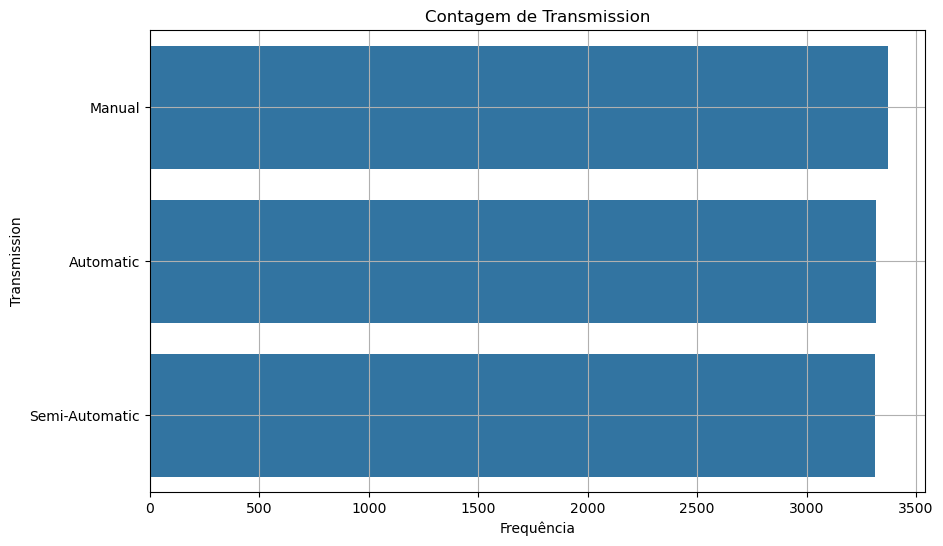

In [27]:
plot_bar(df, 'Transmission')

> A quantidade de diferentes dados de acordo com o sistema de transmiss√£o do ve√≠culo (manual, semiautomatico ou autom√°tico) √© deveras balanceada entre as classes, em que todas as classes tem por volta de 33% de representatividade

### `Mileage`

In [28]:
df['Mileage'].describe()

count     10000.000000
mean     149239.111800
std       86322.348957
min          25.000000
25%       74649.250000
50%      149587.000000
75%      223577.500000
max      299947.000000
Name: Mileage, dtype: float64

In [29]:
# Calcular bins com a regra de Sturges
x = df['Mileage'].dropna()
n = len(df['Mileage'])

sturges_bins = int(np.ceil(np.log2(n) + 1))

# Calcular bins com Rice
rice_bins = int(np.ceil(2 * n ** (1/3)))

# Calcular bins com Freedman‚ÄìDiaconis
iqr = x.quantile(0.75) - x.quantile(0.25)
bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((x.max() - x.min()) / bin_width))

print(f'Sturges: {sturges_bins} bins')
print(f'Rice: {rice_bins} bins')
print(f'Freedman‚ÄìDiaconis: {fd_bins} bins')

Sturges: 15 bins
Rice: 44 bins
Freedman‚ÄìDiaconis: 22 bins


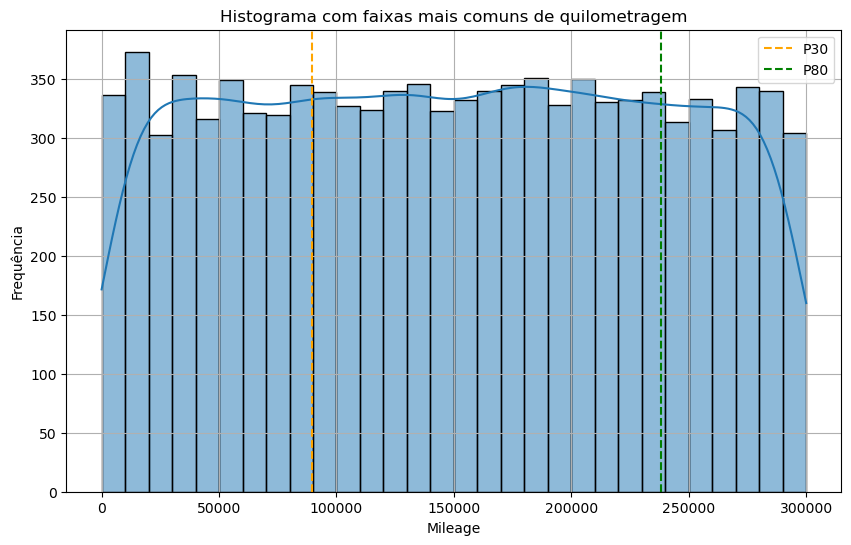

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mileage'], bins=30, kde=True)
plt.axvline(df['Mileage'].quantile(0.3), color='orange', linestyle='--', label='P30')
plt.axvline(df['Mileage'].quantile(0.8), color='green', linestyle='--', label='P80')
plt.legend()
plt.title('Histograma com faixas mais comuns de quilometragem')
plt.xlabel('Mileage')
plt.ylabel('Frequ√™ncia')
plt.grid()
plt.show()


In [31]:
IQR_Mileage = df['Mileage'].quantile(0.75) - df['Mileage'].quantile(0.25)
quartis = df['Mileage'].quantile([0.25, 0.5, 0.75])
percentis = df['Mileage'].quantile([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9])
curtose = stats.kurtosis(df['Mileage'])
assimetria = stats.skew(df['Mileage'])
print(f'IQR da quilometragem: {IQR_Mileage}')
print(f'Quartis da quilometragem:\n{quartis}')
print(f'Percentis da quilometragem:\n{percentis}')
print(f'Curtose da quilometragem: {curtose}')
print(f'Assimetria da quilometragem: {assimetria}')

IQR da quilometragem: 148928.25
Quartis da quilometragem:
0.25     74649.25
0.50    149587.00
0.75    223577.50
Name: Mileage, dtype: float64
Percentis da quilometragem:
0.1     29586.5
0.2     59307.0
0.3     89633.6
0.4    119878.2
0.6    179242.4
0.7    208518.0
0.8    238265.6
0.9    269373.4
Name: Mileage, dtype: float64
Curtose da quilometragem: -1.1909668975513825
Assimetria da quilometragem: 0.0009186334048228518


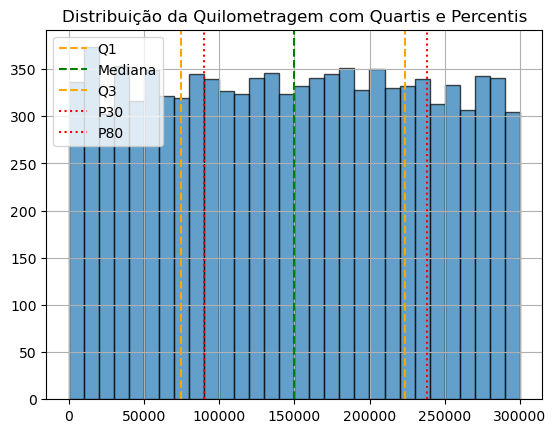

In [32]:
plt.hist(df['Mileage'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(df['Mileage'].quantile(0.25), color='orange', linestyle='--', label='Q1')
plt.axvline(df['Mileage'].quantile(0.5), color='green', linestyle='--', label='Mediana')
plt.axvline(df['Mileage'].quantile(0.75), color='orange', linestyle='--', label='Q3')
plt.axvline(df['Mileage'].quantile(0.3), color='red', linestyle=':', label='P30')
plt.axvline(df['Mileage'].quantile(0.8), color='red', linestyle=':', label='P80')
plt.legend()
plt.title('Distribui√ß√£o da Quilometragem com Quartis e Percentis')
plt.grid()
plt.show()


> Os dados da quilometragem (em milhas) est√£o bem dispersos ao entorno do conjunto dos valores

> A maior parte se encontra dentro da faixa (p3 - p8) de aproximadamente: 90.000 - 240.000 rodados (milhas/ km)

> Embora a distribui√ß√£o seja sim√©trica, a pr√≥pria curtose mostra que ela n√£o √© normal, pelo formato "achatado" (platocurtico) da curva

### `Doors`:

In [33]:
estatistica_qualitativa(df, 'Doors')

Doors  Contagem  Propor√ß√£o (%)
0      3      2575          25.75
1      4      2514          25.14
2      5      2456          24.56
3      2      2455          24.55

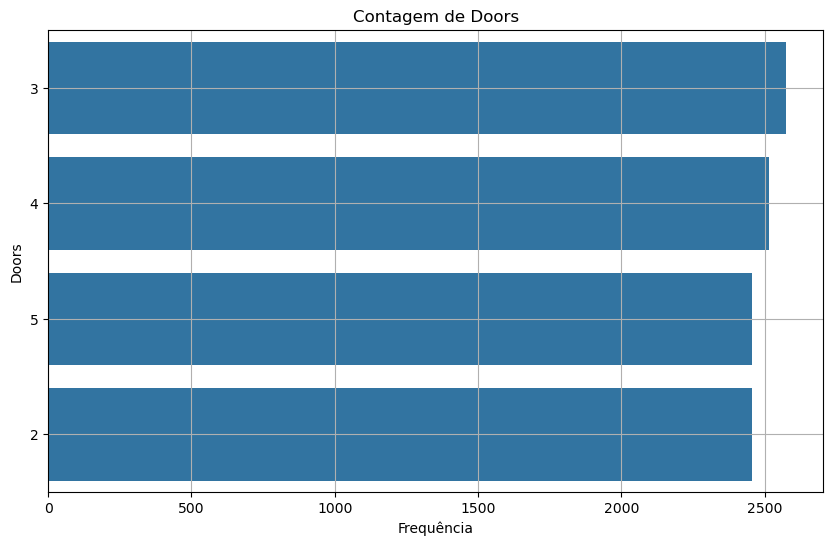

In [34]:
plot_bar(df, 'Doors')

> A quantidade de portas varia entre 2, 3, 4 ou 5 portas (possivelmente variando de acordo com modelo hatch, hatchback ou sedan)

> As classes est√£o relativamente balanceadas em rela√ß√£o a quantidade de registroos de ve√≠culos com cada quantidade de portas.

### `Owner_Count`

In [35]:
df['Owner_Count'].describe()

count    10000.000000
mean         2.991100
std          1.422682
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Owner_Count, dtype: float64

In [36]:
df['Owner_Count'].value_counts()

Owner_Count
5    2036
1    2036
2    2020
3    1977
4    1931
Name: count, dtype: int64

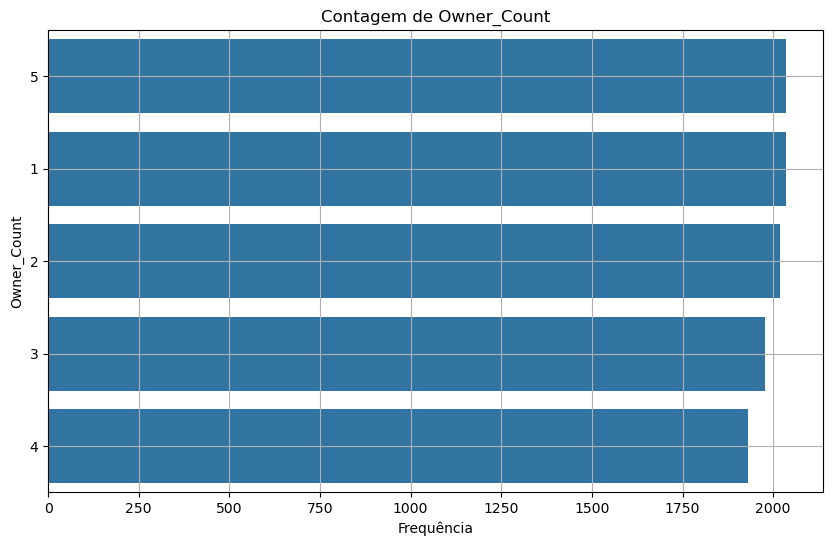

In [37]:
plot_bar(df, 'Owner_Count')

> A quantidade de donos que um ve√≠culo j√° teve tem quantidade de registros bimodal, ou seja, a maior parte dos ve√≠culos j√° teve ou 5 donos ou apenas 1

> No demais, apesar deste fator, a quantidade de registros √© balanceada de acordo com as classes de quantidade de donos.

### `Price`

In [38]:
df['Price'].describe()

count    10000.00000
mean      8852.96440
std       3112.59681
min       2000.00000
25%       6646.00000
50%       8858.50000
75%      11086.50000
max      18301.00000
Name: Price, dtype: float64

In [39]:
# Calcular bins com a regra de Sturges
x = df['Price'].dropna()
n = len(df['Price'])

sturges_bins = int(np.ceil(np.log2(n) + 1))

# Calcular bins com Rice
rice_bins = int(np.ceil(2 * n ** (1/3)))

# Calcular bins com Freedman‚ÄìDiaconis
iqr = x.quantile(0.75) - x.quantile(0.25)
bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((x.max() - x.min()) / bin_width))

print(f'Sturges: {sturges_bins} bins')
print(f'Rice: {rice_bins} bins')
print(f'Freedman‚ÄìDiaconis: {fd_bins} bins')

Sturges: 15 bins
Rice: 44 bins
Freedman‚ÄìDiaconis: 40 bins


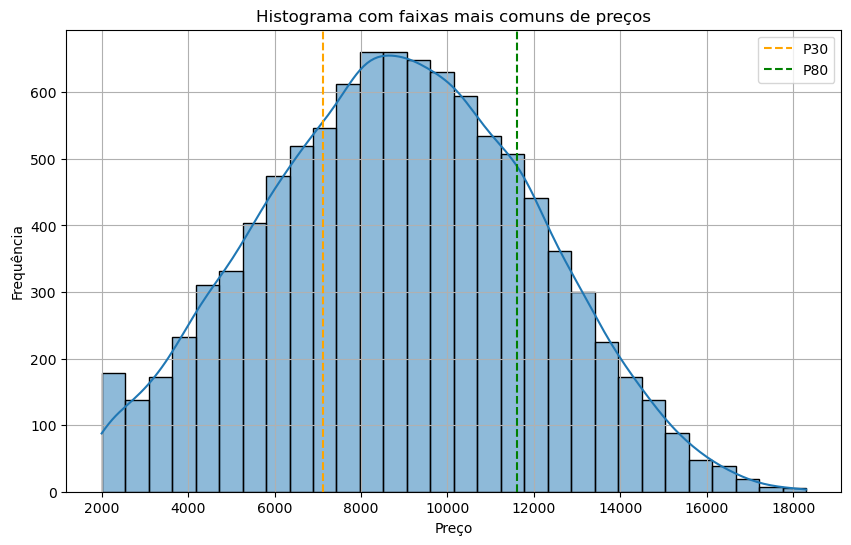

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.axvline(df['Price'].quantile(0.3), color='orange', linestyle='--', label='P30')
plt.axvline(df['Price'].quantile(0.8), color='green', linestyle='--', label='P80')
plt.legend()
plt.title('Histograma com faixas mais comuns de pre√ßos')
plt.xlabel('Pre√ßo')
plt.ylabel('Frequ√™ncia')
plt.grid()
plt.show()


In [41]:
print(f'IQR do pre√ßo: {df["Price"].quantile(0.75) - df["Price"].quantile(0.25)}')
print(f'Quartis do pre√ßo:\n{df["Price"].quantile([0.25, 0.5, 0.75])}')
print(f'Percentis do pre√ßo:\n{df["Price"].quantile([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9])}')
print(f'Curtose do pre√ßo: {stats.kurtosis(df["Price"])}')
print(f'Assimetria do pre√ßo: {stats.skew(df["Price"])}')

IQR do pre√ßo: 4440.5
Quartis do pre√ßo:
0.25     6646.0
0.50     8858.5
0.75    11086.5
Name: Price, dtype: float64
Percentis do pre√ßo:
0.1     4672.4
0.2     6067.4
0.3     7127.7
0.4     8038.0
0.6     9701.4
0.7    10577.0
0.8    11602.6
0.9    12945.3
Name: Price, dtype: float64
Curtose do pre√ßo: -0.482304303022163
Assimetria do pre√ßo: 0.026132295080798108


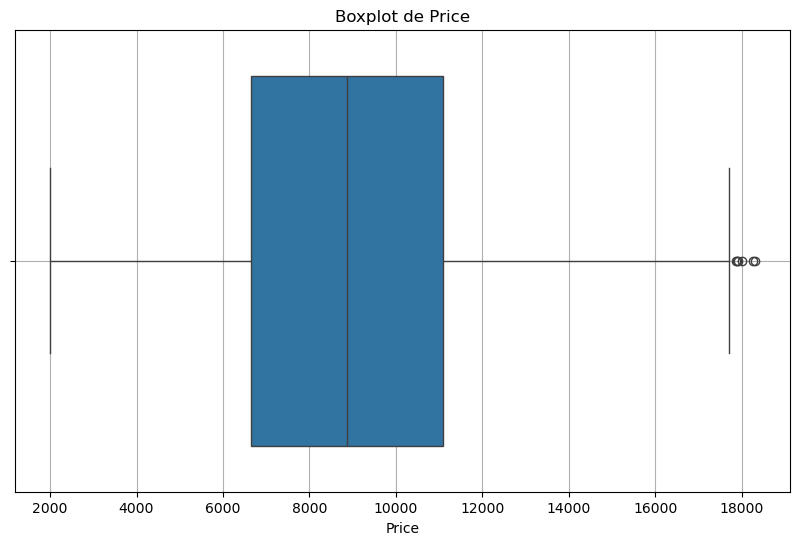

In [42]:
plot_boxplot(df, 'Price')

In [43]:
limiar_inferior = df['Price'].quantile(0.25) - 1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25))
limiar_superior = df['Price'].quantile(0.75) + 1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25))
print(f'Limiar inferior: {limiar_inferior}')
print(f'Limiar superior: {limiar_superior}')

Limiar inferior: -14.75
Limiar superior: 17747.25


> A maior parte dos dados se concentra entre valores de 6500 - 11700, sendo que valores maiores que 17000 j√° podem ser considerados como outliers de pre√ßo.

> O centro da distribui√ß√£o se da ao entorno do valor de 8858

> A mediana pr√≥xima da m√©dia, junto ao baixo grau de assimetria indicam uma poss√≠vel caracter√≠stica de normalidade.

> Todavia, a curtose negativa, mesmo que com baixo valor, indica uma distribui√ß√£o platic√∫rtica, em que h√° menos valores concentrados nas extremidades (comparando com a distribui√ß√£o normal) e um maior conjunto de valores no intervalo central.

## 3) An√°lise Bivariada

### An√°lise da dispers√£o

In [44]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price', 'Engine_Bin'],
      dtype='object')

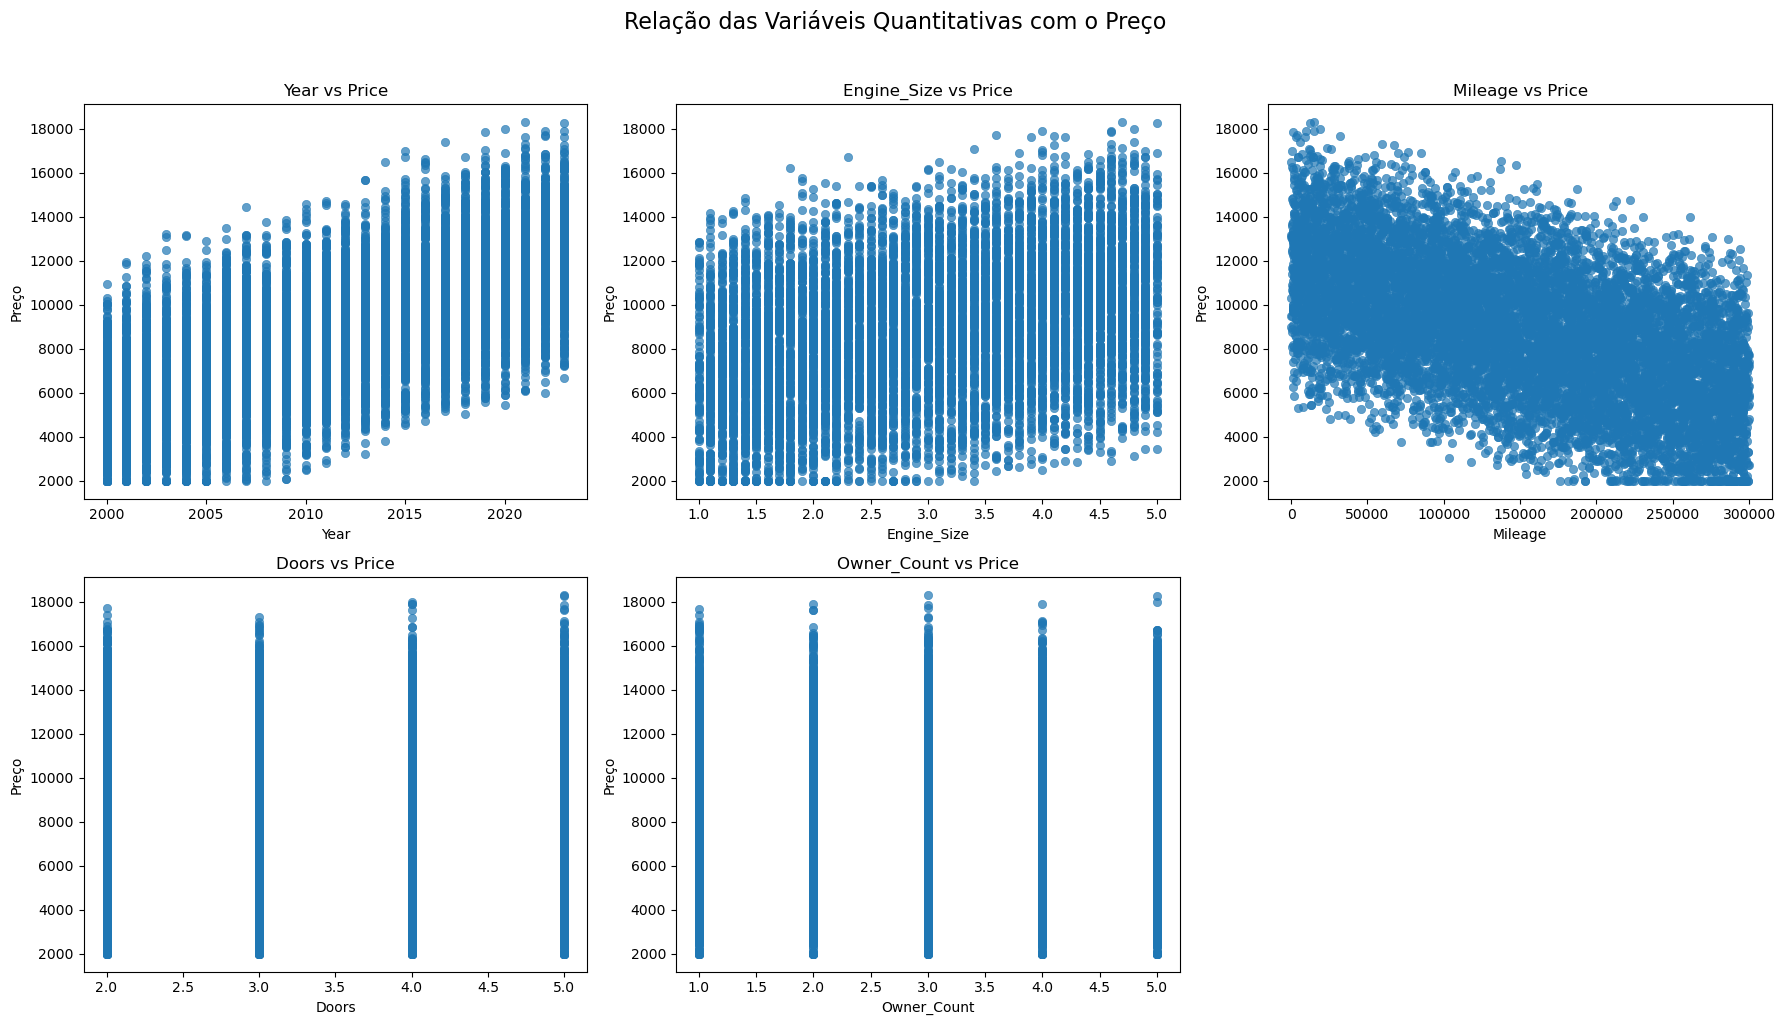

In [45]:
variaveis_explicativas = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']
target = 'Price'

# Tamanho da grade para mostrar os plots (ajusta se tiver mais vari√°veis)
n_linhas = 2
n_colunas = 3
fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(18, 10))
axes = axes.flatten()  # transforma os eixos em vetor pra iterar f√°cil

# Loop para gerar os gr√°ficos
for i, var in enumerate(variaveis_explicativas):
    sns.scatterplot(data=df, x=var, y=target, ax=axes[i], alpha=0.7, edgecolor=None)
    axes[i].set_title(f'{var} vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Pre√ßo')

# Se sobrar algum subplot vazio (caso n√∫mero de vari√°veis < n√∫mero de subplots), esconde
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Rela√ß√£o das Vari√°veis Quantitativas com o Pre√ßo', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### Matriz de correla√ß√£o para vari√°veis quantitativas

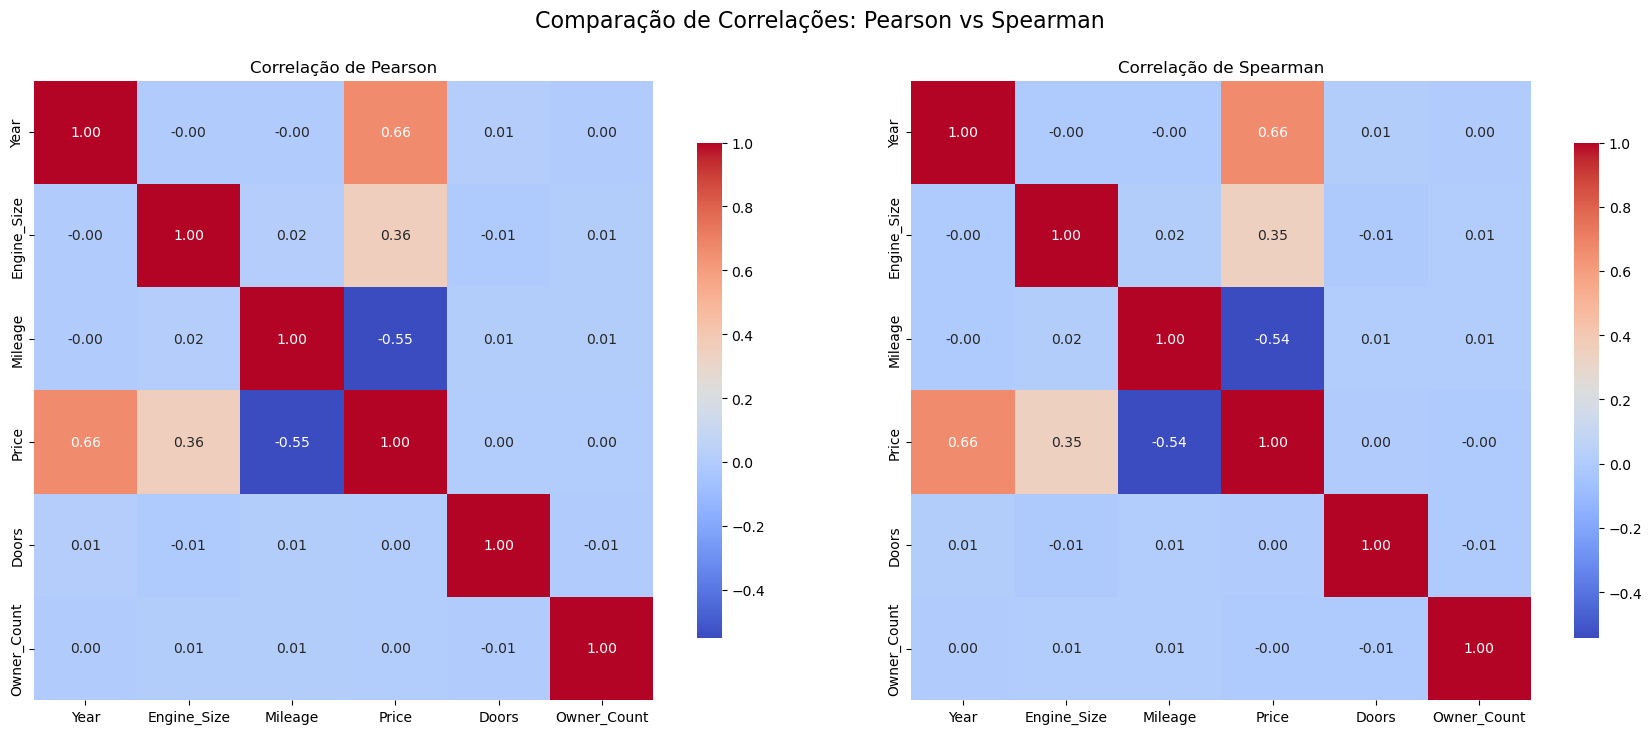

In [46]:
# Seleciona apenas as vari√°veis quantitativas
variaveis_quantitativas = ['Year', 'Engine_Size', 'Mileage', 'Price', 'Doors', 'Owner_Count']
df_variaveis_quantitativas = df[variaveis_quantitativas].copy()

# Calcula as duas matrizes de correla√ß√£o
correlacao_pearson = df_variaveis_quantitativas.corr(method='pearson')
correlacao_spearman = df_variaveis_quantitativas.corr(method='spearman')

# Cria a figura com dois subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Pearson
sns.heatmap(correlacao_pearson, annot=True, fmt='.2f', cmap='coolwarm', square=True, ax=axs[0], cbar_kws={"shrink": .8})
axs[0].set_title('Correla√ß√£o de Pearson')

# Spearman
sns.heatmap(correlacao_spearman, annot=True, fmt='.2f', cmap='coolwarm', square=True, ax=axs[1], cbar_kws={"shrink": .8})
axs[1].set_title('Correla√ß√£o de Spearman')

plt.suptitle('Compara√ß√£o de Correla√ß√µes: Pearson vs Spearman', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [47]:
# Teste de valida√ß√£o de correla√ß√£o
from scipy.stats import pearsonr, spearmanr
def validar_correlacao(df, var1, var2):
    pearson_corr, pearson_p = pearsonr(df[var1], df[var2])
    spearman_corr, spearman_p = spearmanr(df[var1], df[var2])
    
    print(f'Correla√ß√£o de Pearson entre {var1} e {var2}: {pearson_corr:.2f}, p-valor: {pearson_p:.3f}')
    print(f'Correla√ß√£o de Spearman entre {var1} e {var2}: {spearman_corr:.2f}, p-valor: {spearman_p:.3f}')

validar_correlacao(df, 'Year', 'Price')
validar_correlacao(df, 'Engine_Size', 'Price')
validar_correlacao(df, 'Mileage', 'Price')
validar_correlacao(df, 'Doors', 'Price')
validar_correlacao(df, 'Owner_Count', 'Price')

Correla√ß√£o de Pearson entre Year e Price: 0.66, p-valor: 0.000
Correla√ß√£o de Spearman entre Year e Price: 0.66, p-valor: 0.000
Correla√ß√£o de Pearson entre Engine_Size e Price: 0.36, p-valor: 0.000
Correla√ß√£o de Spearman entre Engine_Size e Price: 0.35, p-valor: 0.000
Correla√ß√£o de Pearson entre Mileage e Price: -0.55, p-valor: 0.000
Correla√ß√£o de Spearman entre Mileage e Price: -0.54, p-valor: 0.000
Correla√ß√£o de Pearson entre Doors e Price: 0.00, p-valor: 0.959
Correla√ß√£o de Spearman entre Doors e Price: 0.00, p-valor: 0.823
Correla√ß√£o de Pearson entre Owner_Count e Price: 0.00, p-valor: 0.791
Correla√ß√£o de Spearman entre Owner_Count e Price: -0.00, p-valor: 0.920


> As vari√°veis Ano (Year) e Quilometragem (Mileage) s√£o os preditores mais fortes do pre√ßo, com o ano tendo uma rela√ß√£o positiva e a quilometragem uma rela√ß√£o negativa.

> Tamanho do Motor (Engine_Size) tamb√©m mostra uma tend√™ncia positiva, mas com mais variabilidade.

> Year, Mileage e Engine_Size s√£o estatisticamente significativas e t√™m efeitos visivelmente importantes, o que justifica fortemente a inclus√£o delas numa modelagem de regress√£o posterior.

> Portas (Doors) e N√∫mero de Propriet√°rios (Owner_Count) n√£o parecem ter uma rela√ß√£o clara ou forte com o pre√ßo neste conjunto de dados.

### An√°lise de Vari√°veis Categ√≥ricas

In [48]:
# Fun√ß√µes necess√°rias para o teste ANOVA
def teste_anova(df, variavel_categoria, variavel_numerica):
    """
    Executa ANOVA entre os grupos da vari√°vel categ√≥rica e retorna o p-valor e F-statistic.

    Par√¢metros:
    - df: DataFrame
    - variavel_categoria: nome da coluna categ√≥rica (string)
    - variavel_numerica: nome da coluna num√©rica (string)

    Exemplo:
    teste_anova(df, 'Fuel_Type', 'Price')
    """
    # Agrupa os dados: cria uma lista de arrays de pre√ßos por categoria
    grupos = [grupo[variavel_numerica].values for nome, grupo in df.groupby(variavel_categoria)]
    
    # Garante que existem pelo menos dois grupos
    if len(grupos) < 2:
        print("Erro: ANOVA requer pelo menos 2 grupos.")
        return
    
    # Aplica ANOVA
    f_stat, p_valor = stats.f_oneway(*grupos)
    
    print(f"üîç ANOVA para '{variavel_categoria}' vs '{variavel_numerica}':")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-valor: {p_valor:.10f}")
    
    if p_valor < 0.05:
        print("‚úÖ Diferen√ßa significativa entre os grupos (p < 0.05)")
    else:
        print("‚ùå Nenhuma diferen√ßa significativa entre os grupos (p ‚â• 0.05)")

# Fun√ß√£o para plotar boxplot e realizar ANOVA
def plot_boxplot_anova(df, variavel_categoria, variavel_numerica):
    """
    Plota um boxplot da vari√°vel num√©rica por categoria e executa ANOVA.

    Par√¢metros:
    - df: DataFrame
    - variavel_categoria: nome da coluna categ√≥rica (string)
    - variavel_numerica: nome da coluna num√©rica (string)
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=variavel_categoria, y=variavel_numerica, data=df)
    plt.title(f'Boxplot de {variavel_numerica} por {variavel_categoria}')
    plt.xlabel(variavel_categoria)
    plt.ylabel(variavel_numerica)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


def teste_post_hoc_alternativo(df, variavel_categoria, variavel_numerica, alpha=0.05):
    """
    Executa um teste Post-Hoc de Tukey HSD com uma interpreta√ß√£o alternativa
    que explicita as m√©dias para maior clareza.

    Par√¢metros:
    - df: DataFrame com os dados
    - variavel_categoria: nome da coluna categ√≥rica (string)
    - variavel_numerica: nome da coluna num√©rica (string)
    - alpha: n√≠vel de signific√¢ncia (padr√£o 0.05)

    Requer: statsmodels.stats.multicomp.pairwise_tukeyhsd
    """

    print(f"\nüî¨ Realizando Teste Post-Hoc Alternativo (Tukey HSD) para '{variavel_categoria}' vs '{variavel_numerica}':")

    # 1. Calcular e mostrar as m√©dias de cada grupo para refer√™ncia
    medias_por_grupo = df.groupby(variavel_categoria)[variavel_numerica].mean().sort_values(ascending=False)
    print("\nM√©dias de Pre√ßo por Categoria (para Refer√™ncia):")
    print(medias_por_grupo)

    # 2. Verificar se h√° dados suficientes para cada grupo
    contagens_por_grupo = df.groupby(variavel_categoria).size()
    min_obs_per_group = contagens_por_grupo.min()
    if min_obs_per_group < 2:
        print(f"Aviso: Pelo menos um grupo ('{variavel_categoria}') tem menos de 2 observa√ß√µes. Tukey HSD pode n√£o ser adequado.")
        print("Contagens por grupo:")
        print(contagens_por_grupo)
        return

    try:
        # 3. Executa o teste Tukey HSD
        tukey_results = pairwise_tukeyhsd(endog=df[variavel_numerica],
                                          groups=df[variavel_categoria],
                                          alpha=alpha)

        # 4. Mostra o resumo da an√°lise (a tabela formatada)
        print("\n" + tukey_results.summary().as_text()) # Usar .as_text() para ter controle sobre a impress√£o

        # 5. Interpreta√ß√£o dos resultados com base nas m√©dias e no meandiff
        print("\nüìä Interpreta√ß√£o dos pares com diferen√ßa significativa:")
        
        # Obter os dados do sum√°rio (pulando o cabe√ßalho)
        summary_data = tukey_results.summary().data[1:] 

        significativos = [linha for linha in summary_data if linha[-1] == True] # Filtrar onde 'reject' √© True

        if significativos:
            print(f"Pares com diferen√ßa estatisticamente significativa (p < {alpha}):")
            for linha in significativos:
                group1_name, group2_name, meandiff_val, p_adj_val, _, _, _ = linha
                
                # Converter para float para opera√ß√µes e formata√ß√£o
                meandiff_val = float(meandiff_val)
                p_adj_val = float(p_adj_val)

                # Acessar as m√©dias calculadas para cada grupo
                mean_group1 = medias_por_grupo.loc[group1_name]
                mean_group2 = medias_por_grupo.loc[group2_name]
                
                # Determinar qual grupo √© maior/menor com base nas m√©dias reais
                if mean_group1 > mean_group2:
                    comparacao = f"'{group1_name}' √© mais caro que '{group2_name}'"
                elif mean_group1 < mean_group2:
                    comparacao = f"'{group1_name}' √© mais barato que '{group2_name}'"
                else: # Improv√°vel com floats, mas para completude
                    comparacao = f"'{group1_name}' e '{group2_name}' t√™m o mesmo pre√ßo m√©dio"

                print(f"- {group1_name} vs {group2_name}: Diferen√ßa m√©dia (Group1 - Group2) = {meandiff_val:.2f}, p-valor ajustado = {p_adj_val:.4f}. ({comparacao})")
        else:
            print(f"Nenhum par de grupos apresentou diferen√ßa estatisticamente significativa com p < {alpha}.")

    except Exception as e:
        print(f"\n‚ùå Erro ao executar o teste Tukey HSD: {e}")
        print("üîé Verifique se os nomes das colunas est√£o corretos, se h√° vari√¢ncia nos grupos e se os dados s√£o num√©ricos e categ√≥ricos adequadamente.")


#### `Brand`:

In [49]:
df.groupby('Brand')['Price'].describe()

count         mean          std     min      25%     50%  \
Brand                                                                   
Audi        1038.0  8929.373796  3127.683628  2000.0  6797.25  8917.0   
BMW          999.0  8704.068068  3110.670391  2000.0  6562.00  8741.0   
Chevrolet   1003.0  9015.683948  3124.432775  2000.0  6721.50  9038.0   
Ford        1048.0  8852.570611  3097.290741  2000.0  6695.75  8775.5   
Honda       1009.0  8665.596630  3083.062603  2000.0  6483.00  8624.0   
Hyundai      995.0  8778.279397  3101.123378  2000.0  6571.50  8755.0   
Kia          976.0  8880.086066  3058.533040  2000.0  6648.25  8914.0   
Mercedes     942.0  8980.087049  3111.134790  2000.0  6745.25  9142.0   
Toyota       970.0  8798.184536  3205.189393  2000.0  6445.25  8726.0   
Volkswagen  1020.0  8928.377451  3101.385496  2000.0  6750.00  8976.0   

                 75%      max  
Brand                          
Audi        11189.00  18255.0  
BMW         11064.00  17386.0  
Chevrolet   11285.50  17661.0  
Ford        10964.50  18017.0  
Honda       10799.00  17906.0  
Hyundai     10997.50  17871.0  
Kia         11105.00  17630.0  
Mercedes    11121.75  17614.0  
Toyota      11200.75  18301.0  
Volkswagen  11168.50  16461.0

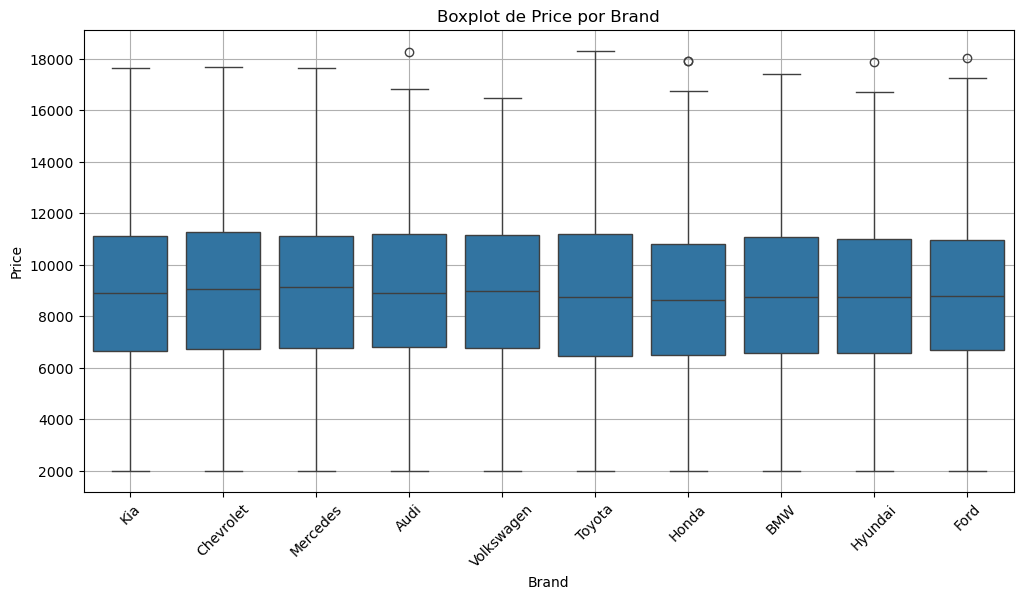

In [50]:
plot_boxplot_anova(df, 'Brand', 'Price')

In [51]:
# ANOVA
teste_anova(df, 'Brand', 'Price')

üîç ANOVA para 'Brand' vs 'Price':
F-statistic: 1.3812
p-valor: 0.1902763700
‚ùå Nenhuma diferen√ßa significativa entre os grupos (p ‚â• 0.05)


> N√£o podemos afirmar, com base nos dados e no teste ANOVA, que a marca do carro influencia significativamente o seu pre√ßo m√©dio.

#### `Model`:

In [52]:
df.groupby('Model')['Price'].describe()

count         mean          std     min      25%     50%       75%  \
Model                                                                          
3 Series  335.0  8854.752239  2985.885089  2000.0  6848.00  8738.0  11237.00   
5 Series  353.0  8669.218130  3183.787781  2000.0  6302.00  8790.0  10981.00   
A3        338.0  8912.316568  3159.567162  2000.0  6653.75  8880.0  11224.50   
A4        350.0  8919.962857  3134.161568  2374.0  6805.50  8889.0  11123.25   
Accord    365.0  8743.761644  2994.428464  2000.0  6620.00  8771.0  10706.00   
C-Class   306.0  8921.660131  3158.725731  2000.0  6825.00  9248.0  11018.50   
CR-V      308.0  8734.714286  2984.999402  2000.0  6727.50  8656.5  10820.50   
Camry     321.0  8712.420561  3160.780175  2000.0  6429.00  8693.0  11188.00   
Civic     336.0  8517.327381  3264.896135  2000.0  5925.75  8427.0  10872.00   
Corolla   325.0  8996.618462  3217.468123  2000.0  6898.00  8773.0  11205.00   
E-Class   321.0  8967.330218  2935.544847  2000.0  6694.00  8887.0  11078.00   
Elantra   347.0  8802.475504  3113.915313  2000.0  6728.00  8696.0  11078.00   
Equinox   315.0  9156.320635  2955.802865  2000.0  6931.50  9212.0  11260.00   
Explorer  334.0  8804.895210  3298.711650  2000.0  6233.75  8666.0  11013.00   
Fiesta    363.0  8971.077135  2912.221809  2000.0  7064.50  8998.0  10974.50   
Focus     351.0  8775.378917  3090.292767  2000.0  6655.00  8758.0  10926.00   
GLA       315.0  9049.844444  3244.167651  2000.0  6718.00  9046.0  11210.00   
Golf      339.0  8765.235988  3237.538744  2000.0  6493.00  8745.0  10987.50   
Impala    355.0  9001.115493  3134.030479  2000.0  6930.50  8856.0  11174.00   
Malibu    333.0  8898.180180  3270.125321  2000.0  6418.00  8866.0  11347.00   
Optima    336.0  8996.318452  2968.359427  2000.0  6704.75  9061.5  11229.25   
Passat    329.0  8914.072948  3217.649973  2000.0  6609.00  9124.0  11335.00   
Q5        350.0  8955.257143  3098.917714  2000.0  6896.00  9031.0  11171.75   
RAV4      324.0  8684.108025  3236.949594  2000.0  6149.25  8699.0  11177.25   
Rio       327.0  8772.571865  3198.883952  2000.0  6595.50  8636.0  11110.00   
Sonata    319.0  8740.830721  3129.204985  2000.0  6549.00  8713.0  10998.50   
Sportage  313.0  8867.635783  3008.929701  2000.0  6693.00  8883.0  11057.00   
Tiguan    352.0  9098.863636  2846.175629  2000.0  7147.75  9113.0  11210.50   
Tucson    329.0  8789.069909  3069.204669  2000.0  6560.00  8875.0  10830.00   
X5        311.0  8581.311897  3161.444253  2000.0  6327.00  8755.0  10830.00   

              max  
Model              
3 Series  17134.0  
5 Series  17386.0  
A3        18255.0  
A4        16619.0  
Accord    17906.0  
C-Class   17614.0  
CR-V      17899.0  
Camry     16712.0  
Civic     16722.0  
Corolla   18301.0  
E-Class   15871.0  
Elantra   17871.0  
Equinox   17054.0  
Explorer  18017.0  
Fiesta    16705.0  
Focus     16969.0  
GLA       16709.0  
Golf      16304.0  
Impala    17072.0  
Malibu    17661.0  
Optima    16893.0  
Passat    16461.0  
Q5        16734.0  
RAV4      16146.0  
Rio       17630.0  
Sonata    16717.0  
Sportage  14959.0  
Tiguan    16334.0  
Tucson    16630.0  
X5        16544.0

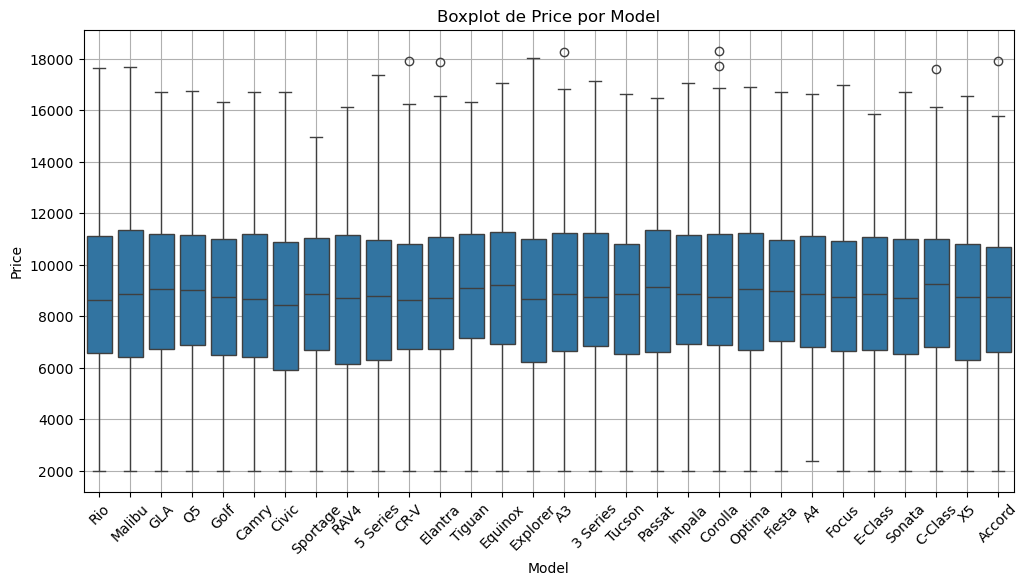

In [53]:
plot_boxplot_anova(df, 'Model', 'Price')

In [54]:
teste_anova(df, 'Model', 'Price')

üîç ANOVA para 'Model' vs 'Price':
F-statistic: 0.7604
p-valor: 0.8177865225
‚ùå Nenhuma diferen√ßa significativa entre os grupos (p ‚â• 0.05)


> Assim como a marca do ve√≠culo, tamb√©m √© pass√≠vel de afirmar que, para o modelo do mesmo, n√£o h√° uma associa√ß√£o significativa, como verific√°vel junto aos dados e ao teste anova, ente Model e Price

#### `Fuel_Type`

In [55]:
df.groupby('Fuel_Type')['Price'].describe()

count          mean          std     min     25%      50%  \
Fuel_Type                                                               
Diesel     2512.0   8117.336385  2979.033575  2000.0  5940.0   8107.0   
Electric   2625.0  10032.220190  2988.575806  2000.0  7881.0  10051.0   
Hybrid     2453.0   9113.030167  3055.538900  2000.0  6955.0   9110.0   
Petrol     2410.0   8070.561826  2994.982789  2000.0  5910.5   8167.5   

                75%      max  
Fuel_Type                     
Diesel     10222.25  16854.0  
Electric   12177.00  18301.0  
Hybrid     11343.00  18255.0  
Petrol     10148.75  16717.0

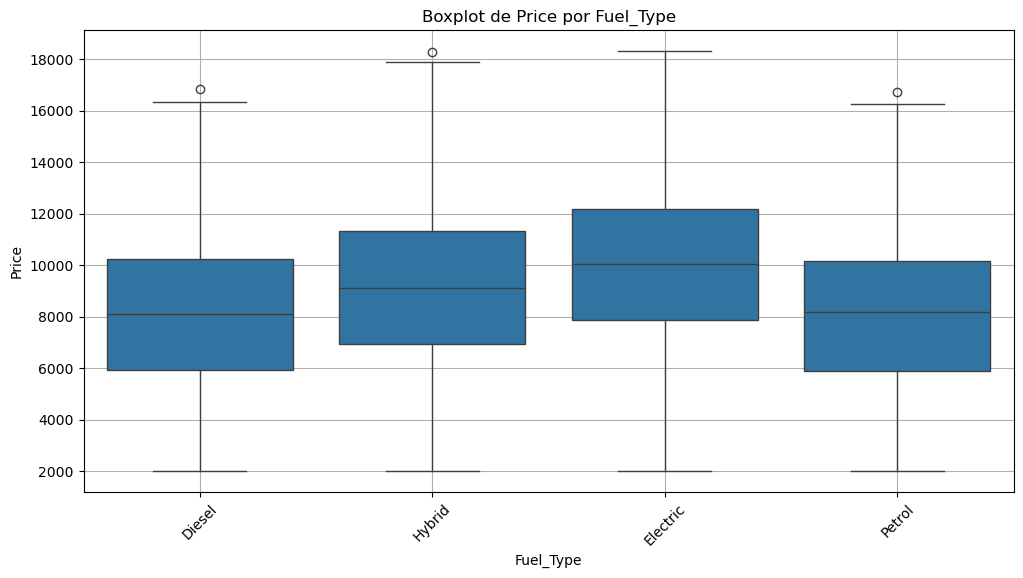

In [56]:
plot_boxplot_anova(df, 'Fuel_Type', 'Price')

In [57]:
teste_anova(df, 'Fuel_Type', 'Price')

üîç ANOVA para 'Fuel_Type' vs 'Price':
F-statistic: 245.6293
p-valor: 0.0000000000
‚úÖ Diferen√ßa significativa entre os grupos (p < 0.05)


In [58]:
teste_post_hoc_alternativo(df, 'Fuel_Type', 'Price')


üî¨ Realizando Teste Post-Hoc Alternativo (Tukey HSD) para 'Fuel_Type' vs 'Price':

M√©dias de Pre√ßo por Categoria (para Refer√™ncia):
Fuel_Type
Electric    10032.220190
Hybrid       9113.030167
Diesel       8117.336385
Petrol       8070.561826
Name: Price, dtype: float64

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
  Diesel Electric  1914.8838    0.0  1699.4243  2130.3433   True
  Diesel   Hybrid   995.6938    0.0   776.5716   1214.816   True
  Diesel   Petrol   -46.7746 0.9476  -266.8836   173.3345  False
Electric   Hybrid    -919.19    0.0 -1135.9696  -702.4105   True
Electric   Petrol -1961.6584    0.0 -2179.4353 -1743.8814   True
  Hybrid   Petrol -1042.4683    0.0 -1263.8697   -821.067   True
----------------------------------------------------------------

üìä Interpreta√ß√£o dos pares com diferen√ßa significativa:
Pares com d

> Como demonstrado pela visualiza√ß√£o dos dados e pelo teste ANOVA, h√° uma varia√ß√£o significativamente estat√≠stica entre as m√©dias de pre√ßos de carros por tipo de combust√≠vel

> O teste post-hoc de Tukey HSD, confirmou a observa√ß√£o demonstrada pelo boxplot, de que carros el√©tricos e h√≠bridos tendem a ser mais caros que os demais, sendo que o primeiro tem um maior pre√ßo.

> Pela relev√¢ncia da associa√ß√£o, Fuel_Type deve ser inserido no modelo de regress√£o

#### `Transmission`:

In [59]:
df.groupby('Transmission')['Price'].describe()

count         mean          std     min     25%      50%  \
Transmission                                                                
Automatic       3317.0  9938.252939  3025.692193  2000.0  7784.0  10034.0   
Manual          3372.0  8363.426157  3019.758983  2000.0  6159.5   8341.5   
Semi-Automatic  3311.0  8264.266385  3006.190812  2000.0  6069.0   8263.0   

                    75%      max  
Transmission                      
Automatic       12070.0  18301.0  
Manual          10514.5  16844.0  
Semi-Automatic  10364.5  17078.0

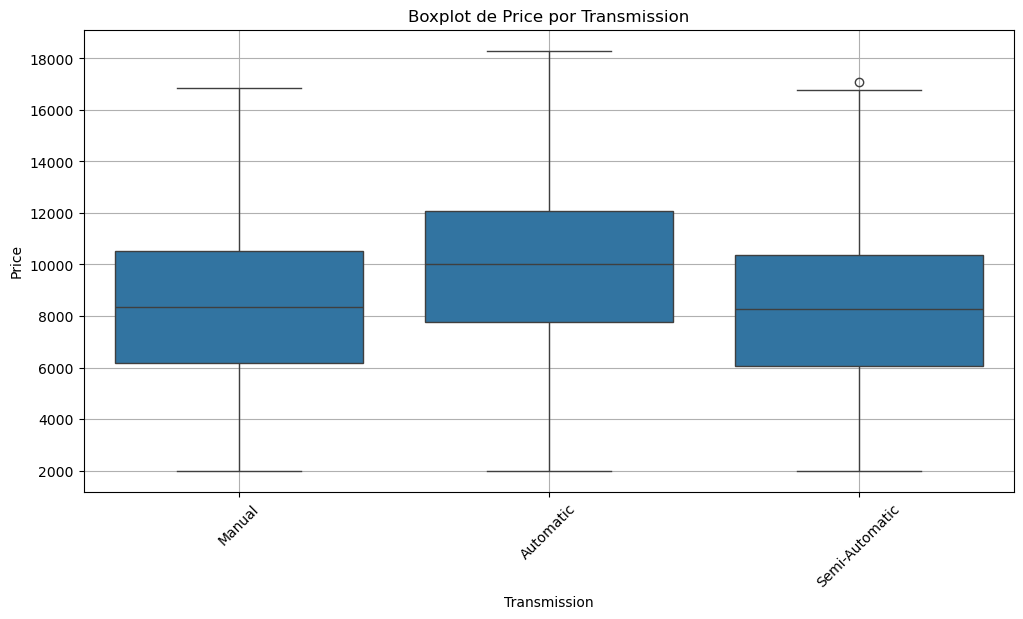

In [60]:
plot_boxplot_anova(df, 'Transmission', 'Price')

In [61]:
teste_anova(df, 'Transmission', 'Price')

üîç ANOVA para 'Transmission' vs 'Price':
F-statistic: 321.9821
p-valor: 0.0000000000
‚úÖ Diferen√ßa significativa entre os grupos (p < 0.05)


In [62]:
teste_post_hoc_alternativo(df, 'Transmission', 'Price')


üî¨ Realizando Teste Post-Hoc Alternativo (Tukey HSD) para 'Transmission' vs 'Price':

M√©dias de Pre√ßo por Categoria (para Refer√™ncia):
Transmission
Automatic         9938.252939
Manual            8363.426157
Semi-Automatic    8264.266385
Name: Price, dtype: float64

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1      group2      meandiff  p-adj    lower      upper    reject
-----------------------------------------------------------------------
Automatic         Manual -1574.8268    0.0 -1747.7852 -1401.8684   True
Automatic Semi-Automatic -1673.9866    0.0 -1847.7332 -1500.2399   True
   Manual Semi-Automatic   -99.1598 0.3712  -272.1972    73.8776  False
-----------------------------------------------------------------------

üìä Interpreta√ß√£o dos pares com diferen√ßa significativa:
Pares com diferen√ßa estatisticamente significativa (p < 0.05):
- Automatic vs Manual: Diferen√ßa m√©dia (Group1 - Group2) = -1574.83, p-valor ajustado = 0.0000.

> De acordo com a observa√ß√£o do boxplot, junto a confirma√ß√£o com o teste ANOVA, o tipo de transmiss√£o do ve√≠culo tamb√©m √© um fator de associa√ß√£o significativa com o pre√ßo do ve√≠culo

> O teste post-hoc de Tukey HSD demonstra que a categoria do Autom√°tico tem uma diferen√ßa de pre√ßo significativa em rela√ß√£o aos demais

> Para a regress√£o, Transmission deve ser inclu√≠do na modelagem.

## 4) An√°lise Multivariada

In [65]:
# Separando vari√°veis quantitativas e categ√≥ricas selecionadas para o modelo
variaveis_quantitativas_modelo = ['Year', 'Engine_Size', 'Mileage']
variaveis_categoricas_modelo = ['Fuel_Type', 'Transmission']
df_variaveis_correlacionadas = df[variaveis_quantitativas_modelo + variaveis_categoricas_modelo + ['Price']].copy()

df_variaveis_correlacionadas.head()

Year  Engine_Size  Mileage Fuel_Type    Transmission  Price
0  2020          4.2   289944    Diesel          Manual   8501
1  2012          2.0     5356    Hybrid       Automatic  12092
2  2020          4.2   231440    Diesel       Automatic  11171
3  2023          2.0   160971  Electric          Manual  11780
4  2003          2.6   286618    Hybrid  Semi-Automatic   2867

### An√°lise de Multicolinearidade:

#### Vari√°veis Quantitativas:

In [75]:
print(df_variaveis_correlacionadas.corr(numeric_only=True))

                 Year  Engine_Size   Mileage     Price
Year         1.000000    -0.001306 -0.002476  0.663036
Engine_Size -0.001306     1.000000  0.015135  0.357403
Mileage     -0.002476     0.015135  1.000000 -0.551227
Price        0.663036     0.357403 -0.551227  1.000000


Text(0.5, 1.0, 'Matriz de Correla√ß√£o das Vari√°veis Selecionadas')

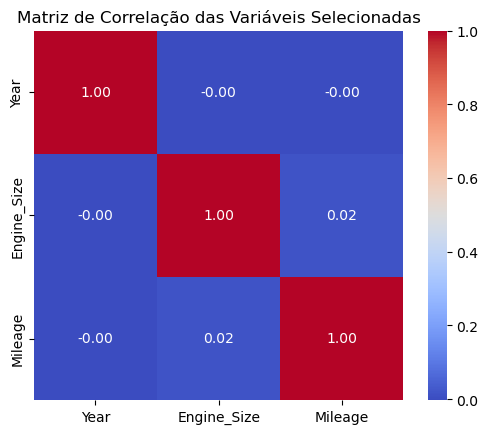

In [73]:
correlacionadas_sem_preco = df_variaveis_correlacionadas.drop(columns=['Price']).copy()
sns.heatmap(correlacionadas_sem_preco.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correla√ß√£o das Vari√°veis Selecionadas')

In [96]:
# Aplicando VIF para verificar multicolinearidade
df_quant = df[variaveis_quantitativas_modelo].copy()

# Adicionar constante para c√°lculo do VIF
X_const = add_constant(df_quant)

# Calcular VIF para cada vari√°vel quantitativa
vif_data = pd.DataFrame({
    'Vari√°vel': X_const.columns,
    'VIF': [vif(X_const.values, i) for i in range(X_const.shape[1])]
})

# Remover a constante e ordenar para visualiza√ß√£o
vif_data = vif_data[vif_data['Vari√°vel'] != 'const'].sort_values(by='VIF', ascending=False)

# Mostrar os valores de VIF
print("VIF - Verifica√ß√£o de multicolinearidade (Vari√°veis Quantitativas):")
print(vif_data.to_string(index=False))

# Interpreta√ß√£o simples do maior VIF
max_vif = vif_data['VIF'].max()
variavel_critica = vif_data.iloc[0]['Vari√°vel']

print("\nInterpreta√ß√£o:")
if max_vif < 5:
    print("Sem ind√≠cios de multicolinearidade (VIF < 5).")
elif max_vif < 10:
    print("Alguma multicolinearidade moderada (VIF entre 5 e 10). Verifique a vari√°vel:", variavel_critica)
else:
    print(f"Multicolinearidade alta (VIF > 10). Considere remover ou tratar a vari√°vel: {variavel_critica}")

VIF - Verifica√ß√£o de multicolinearidade (Vari√°veis Quantitativas):
   Vari√°vel      VIF
    Mileage 1.000235
Engine_Size 1.000231
       Year 1.000008

Interpreta√ß√£o:
Sem ind√≠cios de multicolinearidade (VIF < 5).


> Como demonstrado pelo Fator de Infla√ß√£o de Vari√¢ncia e tamb√©m pela Matriz de Correla√ß√£o entre as vari√°veis num√©ricas selecionadas para o modelo, *n√£o h√°* ind√≠cios de multicolinearidade entre as mesmas, assim sendo, s√£o de relevante considera√ß√£o para explicar e elaborar o modelo futuro de regress√£o.

#### Vari√°veis Qualitativas:

In [87]:
df_variaveis_correlacionadas.groupby('Fuel_Type')['Transmission'].describe()

count unique        top freq
Fuel_Type                             
Diesel     2512      3     Manual  846
Electric   2625      3     Manual  893
Hybrid     2453      3  Automatic  819
Petrol     2410      3     Manual  816

In [91]:
# Tabela de conting√™ncia
tabela_contingencia = pd.crosstab(df_variaveis_correlacionadas['Fuel_Type'], df_variaveis_correlacionadas['Transmission'])
print("\nüìä Tabela de Conting√™ncia entre 'Fuel_Type' e 'Transmission'")
tabela_contingencia


üìä Tabela de Conting√™ncia entre 'Fuel_Type' e 'Transmission'


Transmission  Automatic  Manual  Semi-Automatic
Fuel_Type                                      
Diesel              827     846             839
Electric            881     893             851
Hybrid              819     817             817
Petrol              790     816             804

In [94]:
# --- Definir vari√°veis ---
cat1 = 'Fuel_Type'
cat2 = 'Transmission'

# --- Teste de associa√ß√£o entre vari√°veis categ√≥ricas ---
print(f"\nTeste Qui-Quadrado entre '{cat1}' e '{cat2}'")
chi2, p, dof, expected = stats.chi2_contingency(tabela_contingencia)
print(f"P-valor: {p:.4f}")

# Interpreta√ß√£o do p-valor
if p < 0.05:
    print(f"H√° associa√ß√£o significativa entre '{cat1}' e '{cat2}' (p < 0.05). Pode haver redund√¢ncia.")
else:
    print(f"Nenhuma associa√ß√£o significativa entre '{cat1}' e '{cat2}' (p ‚â• 0.05). Podem ser mantidas.")




Teste Qui-Quadrado entre 'Fuel_Type' e 'Transmission'
P-valor: 0.9841
Nenhuma associa√ß√£o significativa entre 'Fuel_Type' e 'Transmission' (p ‚â• 0.05). Podem ser mantidas.


> Com base na observa√ß√£o da tabela de conting√™ncia e teste qui¬≤ para as vari√°veis categ√≥ricas de Fuel_Type e Transmission, n√£o h√° ind√≠cios de associa√ß√£o entre ambas, descartando uma poss√≠vel multicolinearidade entre as mesmas.

> Ao concluir a an√°lise explorat√≥ria de dados (EDA), verificamos que n√£o h√° ind√≠cios de multicolinearidade significativa dentro dos grupos de vari√°veis ‚Äî tanto entre as vari√°veis num√©ricas quanto entre as categ√≥ricas. Dessa forma, selecionamos para o modelo as vari√°veis:: `Year`, `Milleage`, `Engine_Size`, `Fuel_Type` e `Transmission`

## 5) Salvando dados filtrados para fase de transforma√ß√£o pr√©-modelagem:

In [99]:
dados_para_transformacao = df_variaveis_correlacionadas.copy()

diretorio = '../dados/processed'
nome_arquivo = 'car_price_dataset_for_regression_.csv'
caminho_completo = os.path.join(diretorio, nome_arquivo)

# Criar diret√≥rio se n√£o existir
os.makedirs(diretorio, exist_ok=True)

# Verificar se j√° existe
if os.path.isfile(caminho_completo):
    print(f"Arquivo {nome_arquivo} j√° existia, ser√° sobrescrito.")
else:
    print(f"Criando novo arquivo: {nome_arquivo}")

# Salvar
dados_para_transformacao.to_csv(caminho_completo, index=False)
print(f"Arquivo salvo em: {caminho_completo}")

Arquivo car_price_dataset_for_regression_.csv j√° existia, ser√° sobrescrito.
Arquivo salvo em: ../dados/processed\car_price_dataset_for_regression_.csv
